In [1]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error
import numpy as np
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import glob
from datetime import datetime

Using TensorFlow backend.


In [2]:
from sklearn.impute import KNNImputer

In [3]:
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import model_from_json
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.layers import SimpleRNN

In [4]:
dataframe = pd.read_excel("C:/Users/hp/Desktop/INTERNSHIP/AirPollutionData(Jadavpur).xlsx")
dataframe.head(30)

,From Date,To Date,PM2.5,PM10,NO2,NO,Ozone,SO2,RH,WS,CO
0,01-01-2020 00:00,01-01-2020 01:00,127.65,314.73,70,387.08,5.04,7.78,79.04,0.38,3.18
1,01-01-2020 01:00,01-01-2020 02:00,173.18,347.27,58.02,314.4,4.59,7.05,83.04,0.18,3.14
2,01-01-2020 02:00,01-01-2020 03:00,205.28,386.27,51.5,286.32,4.47,6.78,87.82,0.11,2.97
3,01-01-2020 03:00,01-01-2020 04:00,202.88,338.38,56.2,245.05,4.30,6.35,84.83,0.42,2.44
4,01-01-2020 04:00,01-01-2020 05:00,176.65,262.73,59.2,175.38,4.45,5.65,82.19,0.40,1.71
5,01-01-2020 05:00,01-01-2020 06:00,139.05,214.62,54.35,124.85,4.39,5.88,81.66,0.42,1.67
6,01-01-2020 06:00,01-01-2020 07:00,109.22,169.23,46.92,103.67,4.25,5.97,81.50,0.33,1.5
7,01-01-2020 07:00,01-01-2020 08:00,102.58,181.9,45.65,85.72,4.45,5.92,77.05,0.41,1.38
8,01-01-2020 08:00,01-01-2020 09:00,104.38,211.65,54.95,64.22,4.58,6.5,66.06,0.26,1.24
9,01-01-2020 09:00,01-01-2020 10:00,106.2,235.5,60.98,42.05,5.15,6.85,56.73,0.24,1.22


In [5]:
dataframe.drop("From Date",axis=1,inplace=True)

In [6]:
d0=[]
d1=[]
d2=[]
d3=[]
d4=[]
d5=[]
d6=[]
d7=[]
d8=[]
d9=[]
d10=[]
d11=[]
d12=[]
d13=[]
d14=[]
d15=[]
d16=[]
d17=[]
d18=[]
d19=[]
d20=[]
d21=[]
d22=[]
d23=[]

In [7]:
import datetime
import time
v=dataframe.iloc[:,0].values

for i in v:
    dateTime1 = datetime.datetime.strptime(i, '%d-%m-%Y %H:%M')
    time_float = float(time.mktime(dateTime1.timetuple()))
    print(time_float)
 


1577820600.0
1577824200.0
1577827800.0
1577831400.0
1577835000.0
1577838600.0
1577842200.0
1577845800.0
1577849400.0
1577853000.0
1577856600.0
1577860200.0
1577863800.0
1577867400.0
1577871000.0
1577874600.0
1577878200.0
1577881800.0
1577885400.0
1577889000.0
1577892600.0
1577896200.0
1577899800.0
1577903400.0
1577907000.0
1577910600.0
1577914200.0
1577917800.0
1577921400.0
1577925000.0
1577928600.0
1577932200.0
1577935800.0
1577939400.0
1577943000.0
1577946600.0
1577950200.0
1577953800.0
1577957400.0
1577961000.0
1577964600.0
1577968200.0
1577971800.0
1577975400.0
1577979000.0
1577982600.0
1577986200.0
1577989800.0
1577993400.0
1577997000.0
1578000600.0
1578004200.0
1578007800.0
1578011400.0
1578015000.0
1578018600.0
1578022200.0
1578025800.0
1578029400.0
1578033000.0
1578036600.0
1578040200.0
1578043800.0
1578047400.0
1578051000.0
1578054600.0
1578058200.0
1578061800.0
1578065400.0
1578069000.0
1578072600.0
1578076200.0
1578079800.0
1578083400.0
1578087000.0
1578090600.0
1578094200.0

In [8]:
n=len(v)
print(n)

1440


In [9]:
data = []
for i in range(0, n):
    data.append(time_float)
print(data)

[1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 1583001000.0, 15830

In [10]:
type(time_float)

float

In [11]:
type(v)

numpy.ndarray

In [12]:
dfx=pd.DataFrame(data=data, columns=["Date"])

In [13]:
dfx.head()

,Date
0,1.583001e+09
1,1.583001e+09
2,1.583001e+09
3,1.583001e+09
4,1.583001e+09


In [14]:
dataframe.isnull().sum()

To Date    0
PM2.5      0
PM10       0
NO2        0
NO         0
Ozone      0
SO2        0
RH         0
WS         0
CO         0
dtype: int64

In [15]:
dataframe.isin([0]).sum()

To Date    0
PM2.5      0
PM10       0
NO2        0
NO         0
Ozone      0
SO2        0
RH         0
WS         0
CO         0
dtype: int64

In [16]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   To Date  1440 non-null   object 
 1   PM2.5    1440 non-null   object 
 2   PM10     1440 non-null   object 
 3   NO2      1440 non-null   object 
 4   NO       1440 non-null   object 
 5   Ozone    1440 non-null   float64
 6   SO2      1440 non-null   object 
 7   RH       1440 non-null   float64
 8   WS       1440 non-null   float64
 9   CO       1440 non-null   object 
dtypes: float64(3), object(7)
memory usage: 112.6+ KB


In [17]:
dataframe['PM2.5'].replace('None', np.nan, inplace=True)
dataframe['PM10'].replace('None', np.nan, inplace=True)
dataframe['NO2'].replace('None', np.nan, inplace=True)
dataframe['NO'].replace('None', np.nan, inplace=True)
dataframe['Ozone'].replace('None', np.nan, inplace=True)
dataframe['SO2'].replace('None', np.nan, inplace=True)
dataframe['RH'].replace('None', np.nan, inplace=True)
dataframe['WS'].replace('None', np.nan, inplace=True)
dataframe['CO'].replace('None', np.nan, inplace=True)

In [18]:
x=dataframe.iloc[:,1:10].values

In [19]:
x

array([[1.2765e+02, 3.1473e+02, 7.0000e+01, ..., 7.9040e+01, 3.8000e-01,
        3.1800e+00],
       [1.7318e+02, 3.4727e+02, 5.8020e+01, ..., 8.3040e+01, 1.8000e-01,
        3.1400e+00],
       [2.0528e+02, 3.8627e+02, 5.1500e+01, ..., 8.7820e+01, 1.1000e-01,
        2.9700e+00],
       ...,
       [9.1600e+01, 1.9770e+02, 9.7250e+01, ..., 6.6710e+01, 4.0000e-02,
        3.3800e+00],
       [1.2280e+02, 2.6310e+02, 1.0978e+02, ..., 7.0830e+01, 6.0000e-02,
        4.5400e+00],
       [1.4218e+02, 3.0838e+02, 8.7920e+01, ..., 7.2910e+01, 2.0000e-01,
        4.4500e+00]])

In [20]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(x)
SimpleImputer()
X=imp.transform(x)

In [21]:
X

array([[1.2765e+02, 3.1473e+02, 7.0000e+01, ..., 7.9040e+01, 3.8000e-01,
        3.1800e+00],
       [1.7318e+02, 3.4727e+02, 5.8020e+01, ..., 8.3040e+01, 1.8000e-01,
        3.1400e+00],
       [2.0528e+02, 3.8627e+02, 5.1500e+01, ..., 8.7820e+01, 1.1000e-01,
        2.9700e+00],
       ...,
       [9.1600e+01, 1.9770e+02, 9.7250e+01, ..., 6.6710e+01, 4.0000e-02,
        3.3800e+00],
       [1.2280e+02, 2.6310e+02, 1.0978e+02, ..., 7.0830e+01, 6.0000e-02,
        4.5400e+00],
       [1.4218e+02, 3.0838e+02, 8.7920e+01, ..., 7.2910e+01, 2.0000e-01,
        4.4500e+00]])

In [22]:
df = pd.DataFrame(data=X,columns=["PM2.5", "PM10","NO2","NO","Ozone","SO2","RH","WS","CO"])

In [23]:
df.head(30)

,PM2.5,PM10,NO2,NO,Ozone,SO2,RH,WS,CO
0,127.650000,314.730000,70.00,387.08,5.04,7.78,79.04,0.38,3.18
1,173.180000,347.270000,58.02,314.40,4.59,7.05,83.04,0.18,3.14
2,205.280000,386.270000,51.50,286.32,4.47,6.78,87.82,0.11,2.97
3,202.880000,338.380000,56.20,245.05,4.30,6.35,84.83,0.42,2.44
4,176.650000,262.730000,59.20,175.38,4.45,5.65,82.19,0.40,1.71
5,139.050000,214.620000,54.35,124.85,4.39,5.88,81.66,0.42,1.67
6,109.220000,169.230000,46.92,103.67,4.25,5.97,81.50,0.33,1.50
7,102.580000,181.900000,45.65,85.72,4.45,5.92,77.05,0.41,1.38
8,104.380000,211.650000,54.95,64.22,4.58,6.50,66.06,0.26,1.24
9,106.200000,235.500000,60.98,42.05,5.15,6.85,56.73,0.24,1.22


VIEWING TREND:

In [24]:
for i in range(0,1440):
    a=i%24
    if(a==0):
        t0=X[i]
        d0.append(t0)
    if(a==1):
        t1=X[i]
        d1.append(t1)
    if(a==2):
        t2=X[i]
        d2.append(t2)
    if(a==3):
        t3=X[i]
        d3.append(t3)
    if(a==4):
        t4=X[i]
        d4.append(t4)
    if(a==5):
        t5=X[i]
        d5.append(t5)
    if(a==6):
        t6=X[i]
        d6.append(t6) 
    if(a==7):
        t7=X[i]
        d7.append(t7)
    if(a==8):
        t8=X[i]
        d8.append(t8)
    if(a==9):
        t9=X[i]
        d9.append(t9)
    if(a==10):
        t10=X[i]
        d10.append(t10)
    if(a==11):
        t11=X[i]
        d11.append(t11) 
    if(a==12):
        t12=X[i]
        d12.append(t12)
    if(a==13):
        t13=X[i]
        d13.append(t13)
    if(a==14):
        t14=X[i]
        d14.append(t14)
    if(a==15):
        t15=X[i]
        d15.append(t15)
    if(a==16):
        t16=X[i]
        d16.append(t16)
    if(a==17):
        t17=X[i]
        d17.append(t17)
    if(a==18):
        t18=X[i]
        d18.append(t18)
    if(a==19):
        t19=X[i]
        d19.append(t19)
    if(a==20):
        t20=X[i]
        d20.append(t20)
    if(a==21):
        t21=X[i]
        d21.append(t21)
    if(a==22):
        t22=X[i]
        d22.append(t22)
    if(a==23):
        t23=X[i]
        d23.append(t23) 

In [25]:
columns=["PM2.5", "PM10","NO2","NO","Ozone","SO2","RH","WS","CO"]

df0=pd.DataFrame(d0, columns=columns)
df1=pd.DataFrame(d1, columns=columns)
df2=pd.DataFrame(d2, columns=columns)
df3=pd.DataFrame(d3, columns=columns)
df4=pd.DataFrame(d4, columns=columns)
df5=pd.DataFrame(d5, columns=columns)
df6=pd.DataFrame(d6, columns=columns)
df7=pd.DataFrame(d7, columns=columns)
df8=pd.DataFrame(d8, columns=columns)
df9=pd.DataFrame(d9, columns=columns)
df10=pd.DataFrame(d10, columns=columns)
df11=pd.DataFrame(d11, columns=columns)
df12=pd.DataFrame(d12, columns=columns)
df13=pd.DataFrame(d13, columns=columns)
df14=pd.DataFrame(d14, columns=columns)
df15=pd.DataFrame(d15, columns=columns)
df16=pd.DataFrame(d16, columns=columns)
df17=pd.DataFrame(d17, columns=columns)
df18=pd.DataFrame(d18, columns=columns)
df19=pd.DataFrame(d19, columns=columns)
df20=pd.DataFrame(d20, columns=columns)
df21=pd.DataFrame(d21, columns=columns)
df22=pd.DataFrame(d22, columns=columns)
df23=pd.DataFrame(d23, columns=columns)
print(df0)

         PM2.5        PM10    NO2          NO  Ozone    SO2     RH    WS  \
0   127.650000  314.730000  70.00  387.080000   5.04   7.78  79.04  0.38   
1   118.650000  247.000000  58.85  200.620000   3.89   6.48  83.74  0.36   
2   128.000000  237.850000  48.33  180.900000   4.08   5.80  79.45  0.23   
3    21.520000   31.400000  29.33   19.250000   3.75   8.10  99.03  0.23   
4    81.150000  154.620000  31.83  170.300000   4.20   9.35  99.03  0.13   
5   153.820000  237.380000  37.05  351.730000   4.03   9.90  99.06  0.11   
6    95.500000  191.030000  49.58   84.250000   4.30   7.88  85.17  0.16   
7   109.170000  307.080000  47.73  330.250000   4.30   9.78  98.00  0.13   
8    29.120000  175.680000  38.00   93.670000   3.83   8.12  91.13  0.16   
9    46.120000   92.800000  36.38   40.380000   4.13   7.67  93.40  0.39   
10   68.670000  116.880000  40.15    9.070000   6.25   7.38  70.66  0.36   
11  158.900000  253.950000  52.00  113.470000   4.35   8.07  82.03  0.43   
12  125.9700

In [26]:
df0.describe()

,PM2.5,PM10,NO2,NO,Ozone,SO2,RH,WS,CO
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,95.042299,196.318066,55.575333,155.630828,4.538167,8.230167,83.019333,0.163000,2.056165
std,40.616543,80.842009,15.902097,125.267878,1.707452,1.886081,9.932526,0.142927,1.154412
min,21.520000,31.400000,22.930000,3.080000,1.810000,4.800000,55.860000,0.040000,0.360000
25%,67.162500,119.695000,43.425000,42.780000,4.017500,7.180000,76.180000,0.077500,1.105000
50%,101.165000,210.915000,56.325000,143.590000,4.215000,8.110000,83.595000,0.110000,1.970000
75%,121.475000,240.137500,69.292500,231.617500,4.492500,9.562500,89.792500,0.170000,2.607500
max,187.000000,387.600000,89.780000,484.350000,12.810000,12.250000,99.060000,0.810000,5.000000


In [27]:
df1.describe()

,PM2.5,PM10,NO2,NO,Ozone,SO2,RH,WS,CO
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,92.857965,186.137733,51.376333,147.780167,4.542333,7.888167,84.255167,0.179833,1.748332
std,39.526024,75.671795,13.950447,122.521591,1.633228,1.751715,10.158399,0.154058,0.919338
min,21.500000,36.480000,20.820000,2.980000,1.660000,4.450000,62.600000,0.030000,0.400000
25%,64.640000,125.912500,41.082500,46.110000,3.977500,6.245000,75.957500,0.077500,1.075000
50%,98.775000,189.675000,50.135000,134.250000,4.210000,8.185000,84.845000,0.115000,1.665000
75%,115.357500,224.870000,63.077500,240.017500,4.502500,9.127500,92.130000,0.235000,2.232500
max,179.220000,366.700000,76.280000,482.600000,12.850000,11.200000,99.080000,0.700000,4.290000


In [28]:
df2.describe()

,PM2.5,PM10,NO2,NO,Ozone,SO2,RH,WS,CO
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,87.529066,168.762700,47.825500,123.924500,4.582333,7.829000,84.412667,0.213667,1.583165
std,40.244534,68.131674,12.431483,103.389095,1.712766,1.686801,10.581841,0.180573,0.844204
min,13.180000,37.800000,22.980000,5.700000,1.720000,4.400000,61.700000,0.050000,0.430000
25%,57.712500,114.015000,39.287500,40.617500,3.970000,6.392500,76.455000,0.080000,0.927500
50%,90.650000,173.040000,48.200000,107.250000,4.165000,8.190000,85.725000,0.120000,1.410000
75%,108.100000,213.147500,57.610000,198.762500,4.455000,9.205000,92.840000,0.305000,2.040000
max,205.280000,386.270000,72.330000,427.700000,13.820000,11.170000,99.080000,0.790000,4.220000


In [29]:
df3.describe()

,PM2.5,PM10,NO2,NO,Ozone,SO2,RH,WS,CO
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,83.530066,155.019700,46.171500,101.186167,4.513167,7.636333,83.202667,0.275500,1.363498
std,37.030347,65.692188,11.881816,87.284568,0.987942,1.717924,11.514189,0.228023,0.748569
min,18.950000,39.700000,23.830000,5.600000,2.170000,4.350000,59.330000,0.040000,0.450000
25%,58.575000,110.650000,37.225000,31.545000,4.027500,6.060000,75.682500,0.087500,0.832500
50%,84.815000,152.370000,45.310000,77.525000,4.225000,7.925000,83.890000,0.205000,1.179954
75%,100.757500,192.875000,55.110000,149.370000,4.842500,8.857500,93.505000,0.395000,1.787500
max,202.880000,358.900000,72.580000,346.450000,7.420000,11.400000,99.080000,0.910000,3.650000


In [30]:
df4.describe()

,PM2.5,PM10,NO2,NO,Ozone,SO2,RH,WS,CO
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,79.538733,149.232700,44.593333,82.064500,4.461667,7.342667,83.567000,0.276833,1.176665
std,35.951044,65.141655,10.360248,74.247866,1.051620,1.632786,11.689187,0.268622,0.662350
min,22.350000,41.920000,24.300000,4.820000,1.970000,4.500000,51.780000,0.030000,0.430000
25%,56.352500,111.075000,37.325000,27.332500,3.980000,5.612500,77.462500,0.080000,0.730000
50%,77.695000,143.805000,44.685000,58.450000,4.270000,7.575000,84.270000,0.165000,0.960000
75%,98.337500,176.450000,52.935000,119.012500,4.577500,8.685000,93.292500,0.400000,1.560000
max,176.650000,412.350000,65.530000,287.600000,8.570000,10.450000,99.080000,1.120000,3.220000


In [31]:
df5.describe()

,PM2.5,PM10,NO2,NO,Ozone,SO2,RH,WS,CO
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,77.843899,145.090033,43.783833,70.201333,4.512000,7.308667,84.037000,0.251500,1.198165
std,32.807010,56.211029,9.713269,63.409320,1.392319,1.502255,11.357038,0.267872,0.604829
min,21.730000,39.050000,22.620000,4.880000,1.990000,4.800000,55.840000,0.040000,0.410000
25%,56.467500,114.252500,35.665000,21.375000,3.937500,5.587500,77.300000,0.097500,0.780000
50%,76.335000,136.310000,44.340000,53.085000,4.210000,7.670000,84.795000,0.140000,1.060000
75%,95.075000,173.697500,52.045000,98.192500,4.620000,8.457500,94.577500,0.322500,1.477500
max,175.700000,341.670000,61.530000,251.070000,10.620000,10.100000,99.080000,1.660000,2.990000


In [32]:
df23.describe()

,PM2.5,PM10,NO2,NO,Ozone,SO2,RH,WS,CO
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,95.638965,201.839500,59.551667,157.278825,4.700333,8.42650,80.762667,0.159333,2.157165
std,42.716960,83.208773,18.791200,123.060285,2.149710,1.73799,10.560719,0.136094,1.186560
min,19.600000,33.850000,19.980000,3.420000,1.820000,4.75000,50.050000,0.040000,0.400000
25%,67.600000,135.070000,45.657500,46.420000,3.935000,7.29250,72.720000,0.070000,1.205000
50%,99.875000,211.050000,59.950000,150.825000,4.250000,8.45500,80.700000,0.100000,2.000000
75%,123.525000,243.675000,71.617500,259.420000,4.412500,9.57750,88.490000,0.192500,2.687500
max,204.000000,373.020000,101.570000,483.250000,16.040000,12.65000,99.030000,0.670000,5.050000


In [33]:
df13.describe()

,PM2.5,PM10,NO2,NO,Ozone,SO2,RH,WS,CO
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,53.082566,117.045533,38.115890,9.438823,25.794000,10.173500,46.042333,0.680333,0.611497
std,24.148185,46.118007,8.809443,16.818004,18.268365,3.901201,15.782820,0.331739,0.195411
min,7.620000,27.930000,12.300000,3.050000,5.840000,4.080000,26.640000,0.110000,0.280000
25%,36.657500,86.730000,33.062500,4.150000,13.535000,8.050000,36.207500,0.387500,0.480000
50%,51.775000,120.125000,36.875000,4.525000,19.350000,8.985000,43.185000,0.695000,0.580000
75%,67.000000,142.905000,43.862500,5.250000,33.362500,10.437500,51.277500,0.922500,0.680000
max,154.200000,284.580000,66.800000,71.489838,87.280000,23.930000,98.600000,1.560000,1.300000


In [34]:
df17.describe()

,PM2.5,PM10,NO2,NO,Ozone,SO2,RH,WS,CO
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,49.177899,109.961033,48.689139,14.700997,18.470167,9.452167,57.816500,0.311833,0.713665
std,23.661595,41.622875,16.753452,26.683887,13.486393,2.955125,14.210349,0.205719,0.270527
min,8.050000,27.700000,22.480000,2.000000,3.790000,4.200000,35.130000,0.060000,0.380000
25%,33.482500,85.447500,38.080000,4.045000,7.335000,7.755000,47.345000,0.137500,0.520000
50%,46.750000,107.975000,44.260000,4.775000,14.545000,8.850000,56.655000,0.280000,0.680000
75%,62.727500,132.252500,57.135000,10.657500,26.642500,10.620000,63.910000,0.475000,0.770000
max,120.250000,240.670000,107.800000,156.450000,58.470000,20.680000,99.030000,0.850000,1.810000


In [35]:
df18.describe()

,PM2.5,PM10,NO2,NO,Ozone,SO2,RH,WS,CO
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,53.052233,122.860200,60.150833,46.189000,7.395333,8.461000,65.271000,0.188000,1.023498
std,22.987198,42.981168,19.024575,59.973613,5.514897,2.176001,12.732217,0.147336,0.416457
min,12.220000,39.280000,24.480000,3.720000,2.470000,4.230000,46.620000,0.040000,0.450000
25%,34.215000,92.130000,46.612500,6.037500,4.310000,7.377500,56.690000,0.070000,0.787500
50%,54.805000,122.635000,58.175000,18.465000,5.565000,8.175000,63.520000,0.135000,0.915000
75%,65.400000,145.090000,74.092500,61.030000,8.090000,9.135000,70.262500,0.295000,1.147500
max,123.220000,237.730000,97.500000,257.070000,35.710000,16.720000,99.030000,0.600000,2.380000


In [36]:
df20.describe()

,PM2.5,PM10,NO2,NO,Ozone,SO2,RH,WS,CO
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,74.395365,180.267233,64.961833,113.923667,5.607833,8.529667,73.062667,0.172000,1.752332
std,30.643655,80.370391,20.984899,97.795287,4.434640,1.696924,11.595804,0.165671,0.795506
min,18.150000,37.620000,26.750000,4.600000,0.060000,4.420000,48.430000,0.040000,0.500000
25%,58.532500,136.880000,51.880000,27.705000,3.980000,7.815000,65.525000,0.070000,1.180000
50%,74.540000,170.275000,65.435000,84.425000,4.370000,8.525000,71.345000,0.105000,1.665000
75%,89.637500,194.877500,78.537500,179.087500,4.677500,9.460000,79.120000,0.172500,2.145000
max,177.200000,419.000000,115.670000,340.480000,27.170000,14.550000,99.030000,0.840000,3.500000


In [37]:
df21.describe()

,PM2.5,PM10,NO2,NO,Ozone,SO2,RH,WS,CO
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,87.074965,201.800066,64.897833,152.667000,5.451833,8.398167,76.194167,0.182000,1.817165
std,40.634850,91.072205,22.005424,126.612419,4.007904,1.406273,10.937393,0.197585,0.858950
min,16.500000,38.100000,25.170000,2.750000,2.130000,4.530000,54.230000,0.040000,0.400000
25%,65.227500,147.700000,47.205000,46.912500,3.982500,7.752500,68.302500,0.070000,1.240000
50%,85.975000,198.075000,66.655000,118.250000,4.260000,8.545000,75.975000,0.090000,1.745000
75%,110.437500,227.797500,78.217500,231.197500,4.552500,9.320000,82.882500,0.172500,2.240000
max,217.100000,417.620000,113.330000,449.550000,20.740000,11.570000,99.030000,0.950000,3.780000


In [38]:
df23.describe()

,PM2.5,PM10,NO2,NO,Ozone,SO2,RH,WS,CO
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000,60.000000
mean,95.638965,201.839500,59.551667,157.278825,4.700333,8.42650,80.762667,0.159333,2.157165
std,42.716960,83.208773,18.791200,123.060285,2.149710,1.73799,10.560719,0.136094,1.186560
min,19.600000,33.850000,19.980000,3.420000,1.820000,4.75000,50.050000,0.040000,0.400000
25%,67.600000,135.070000,45.657500,46.420000,3.935000,7.29250,72.720000,0.070000,1.205000
50%,99.875000,211.050000,59.950000,150.825000,4.250000,8.45500,80.700000,0.100000,2.000000
75%,123.525000,243.675000,71.617500,259.420000,4.412500,9.57750,88.490000,0.192500,2.687500
max,204.000000,373.020000,101.570000,483.250000,16.040000,12.65000,99.030000,0.670000,5.050000


PLOTTING

In [39]:
import matplotlib.pyplot as plt

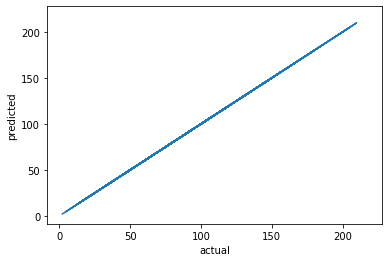

In [40]:
a=dataframe["PM2.5"]
b=df['PM2.5']
plt.plot(a, b)
plt.xlabel('actual')
plt.ylabel('predicted')
plt.show()

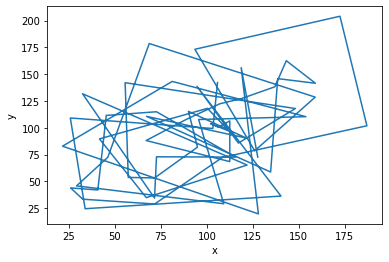

In [41]:
a=df0["PM2.5"]
b=df23['PM2.5']
plt.plot(a, b)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [42]:
df["Date"]=dfx["Date"]

In [43]:
df.describe()

,PM2.5,PM10,NO2,NO,Ozone,SO2,RH,WS,CO,Date
count,1440.000000,1440.000000,1440.00000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1440.000000,1.440000e+03
mean,72.603961,149.501983,49.22835,71.489838,12.704264,8.744027,68.297667,0.349194,1.189908,1.583001e+09
std,35.206485,68.448678,17.68772,94.520860,17.737476,3.121994,19.334295,0.295897,0.828058,0.000000e+00
min,2.300000,21.600000,10.20000,2.000000,0.060000,3.680000,25.000000,0.030000,0.120000,1.583001e+09
25%,46.120000,101.422500,36.25000,6.022500,4.200000,7.430000,52.925000,0.100000,0.600000,1.583001e+09
50%,70.440000,140.475000,46.21000,26.085000,5.145000,8.450000,70.205000,0.255000,0.900000,1.583001e+09
75%,92.927500,185.897500,59.36750,103.617500,12.795000,9.450000,83.905000,0.530000,1.540000,1.583001e+09
max,217.100000,419.000000,154.43000,491.200000,144.530000,51.770000,99.080000,1.660000,5.050000,1.583001e+09


In [44]:
df.corr()

,PM2.5,PM10,NO2,NO,Ozone,SO2,RH,WS,CO,Date
PM2.5,1.000000,0.811910,0.427734,0.538052,-0.190214,0.012884,0.200676,-0.219610,0.629532,NaN
PM10,0.811910,1.000000,0.554764,0.661382,-0.194324,0.046024,0.152046,-0.280913,0.756901,NaN
NO2,0.427734,0.554764,1.000000,0.568315,-0.326950,-0.026203,-0.005004,-0.405728,0.628856,NaN
NO,0.538052,0.661382,0.568315,1.000000,-0.299704,0.015112,0.374098,-0.469705,0.907877,NaN
Ozone,-0.190214,-0.194324,-0.326950,-0.299704,1.000000,0.576320,-0.560652,0.361145,-0.369900,NaN
SO2,0.012884,0.046024,-0.026203,0.015112,0.576320,1.000000,-0.339805,0.116930,0.001349,NaN
RH,0.200676,0.152046,-0.005004,0.374098,-0.560652,-0.339805,1.000000,-0.496792,0.397243,NaN
WS,-0.219610,-0.280913,-0.405728,-0.469705,0.361145,0.116930,-0.496792,1.000000,-0.479378,NaN
CO,0.629532,0.756901,0.628856,0.907877,-0.369900,0.001349,0.397243,-0.479378,1.000000,NaN
Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


LINEAR REGRESSION

In [45]:
e=df.iloc[:,0].values ## PM2.5

In [46]:
print(e)

[127.65 173.18 205.28 ...  91.6  122.8  142.18]


In [47]:
e[1]

173.18

Taking 2 at a time

In [48]:
x1=[]
x2=[]
y=[]

In [49]:
x1=df.iloc[0:1438,0].values

In [50]:
x1

array([127.65, 173.18, 205.28, ...,  49.65,  67.5 ,  91.6 ])

In [51]:
x2=df.iloc[1:1439,0].values

In [52]:
x2

array([173.18, 205.28, 202.88, ...,  67.5 ,  91.6 , 122.8 ])

In [53]:
y=df.iloc[2:1440,0].values

In [54]:
y

array([205.28, 202.88, 176.65, ...,  91.6 , 122.8 , 142.18])

In [55]:
X1=pd.DataFrame({'x1':x1, 'x2':x2,'y':y})

In [56]:
type(X1)

pandas.core.frame.DataFrame

In [57]:
X1.head(5)

,x1,x2,y
0,127.65,173.18,205.28
1,173.18,205.28,202.88
2,205.28,202.88,176.65
3,202.88,176.65,139.05
4,176.65,139.05,109.22


In [58]:
X = X1[['x1','x2']] 
Y = X1['y']

In [59]:
from sklearn import linear_model
import statsmodels.api as sm

In [60]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [61]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 6.226046073058171
Coefficients: 
 [-0.1633168   1.07717111]


In [62]:
X = sm.add_constant(X)

In [63]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

In [64]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     4535.
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:29:28   Log-Likelihood:                -5725.3
No. Observations:                1438   AIC:                         1.146e+04
Df Residuals:                    1435   BIC:                         1.147e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2260      0.797      7.812      0.0

For PM10

In [65]:
x1=[]
x2=[]
x3=[]
x4=[]
x5=[]
x6=[]
y=[]

In [66]:
x1=df.iloc[0:1434,1].values
x2=df.iloc[1:1435,1].values
x3=df.iloc[2:1436,1].values
x4=df.iloc[3:1437,1].values
x5=df.iloc[4:1438,1].values
x6=df.iloc[5:1439,1].values
y=df.iloc[6:1440,1].values

In [67]:
X2=pd.DataFrame({'x1':x1, 'x2':x2,'x3':x3,'x4':x4,'x5':x5,'x6':x6,'y':y})

In [68]:
X = X2[['x1','x2','x3','x4','x5','x6']] 
Y = X2['y']

In [69]:
regr = linear_model.LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [70]:
X = sm.add_constant(X)

In [71]:
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     1428.
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:29:39   Log-Likelihood:                -6682.7
No. Observations:                1434   AIC:                         1.338e+04
Df Residuals:                    1427   BIC:                         1.342e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.9453      1.877      8.497      0.0

For NO2

In [72]:
x1=df.iloc[0:1438,2].values
x2=df.iloc[1:1439,2].values
y=df.iloc[2:1440,2].values

In [73]:
X3=pd.DataFrame({'x1':x1, 'x2':x2,'y':y})

In [74]:
X = X3[['x1','x2']] 
Y = X3['y']

In [75]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     2134.
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:29:46   Log-Likelihood:                -5179.3
No. Observations:                1438   AIC:                         1.036e+04
Df Residuals:                    1435   BIC:                         1.038e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0258      0.718     12.572      0.0

For NO

In [76]:
x1=df.iloc[0:1438,3].values
x2=df.iloc[1:1439,3].values
y=df.iloc[2:1440,3].values

In [77]:
X3=pd.DataFrame({'x1':x1, 'x2':x2,'y':y})
X = X3[['x1','x2']] 
Y = X3['y']

In [78]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     3128.
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:29:50   Log-Likelihood:                -7366.0
No. Observations:                1438   AIC:                         1.474e+04
Df Residuals:                    1435   BIC:                         1.475e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.8695      1.357      6.536      0.0

For Ozone

In [79]:
x1=df.iloc[0:1434,4].values
x2=df.iloc[1:1435,4].values
x3=df.iloc[2:1436,4].values
x4=df.iloc[3:1437,4].values
x5=df.iloc[4:1438,4].values
x6=df.iloc[5:1439,4].values
y=df.iloc[6:1440,4].values

In [80]:
X2=pd.DataFrame({'x1':x1, 'x2':x2,'x3':x3,'x4':x4,'x5':x5,'x6':x6,'y':y})
X = X2[['x1','x2','x3','x4','x5','x6']] 
Y = X2['y']

In [81]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.607
Method:                 Least Squares   F-statistic:                     370.1
Date:                Sat, 27 Jun 2020   Prob (F-statistic):          1.47e-286
Time:                        10:29:55   Log-Likelihood:                -5487.4
No. Observations:                1434   AIC:                         1.099e+04
Df Residuals:                    1427   BIC:                         1.103e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2416      0.420     10.097      0.0

For SO2

In [82]:
x1=df.iloc[0:1434,5].values
x2=df.iloc[1:1435,5].values
x3=df.iloc[2:1436,5].values
x4=df.iloc[3:1437,5].values
x5=df.iloc[4:1438,5].values
x6=df.iloc[5:1439,5].values
y=df.iloc[6:1440,5].values

In [83]:
X2=pd.DataFrame({'x1':x1, 'x2':x2,'x3':x3,'x4':x4,'x5':x5,'x6':x6,'y':y})
X = X2[['x1','x2','x3','x4','x5','x6']] 
Y = X2['y']

In [84]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     339.2
Date:                Sat, 27 Jun 2020   Prob (F-statistic):          2.05e-270
Time:                        10:30:00   Log-Likelihood:                -3032.7
No. Observations:                1434   AIC:                             6079.
Df Residuals:                    1427   BIC:                             6116.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2444      0.203     11.053      0.0

For RH

In [85]:
x1=df.iloc[0:1434,6].values
x2=df.iloc[1:1435,6].values
x3=df.iloc[2:1436,6].values
x4=df.iloc[3:1437,6].values
x5=df.iloc[4:1438,6].values
x6=df.iloc[5:1439,6].values
y=df.iloc[6:1440,6].values

In [86]:
X2=pd.DataFrame({'x1':x1, 'x2':x2,'x3':x3,'x4':x4,'x5':x5,'x6':x6,'y':y})
X = X2[['x1','x2','x3','x4','x5','x6']] 
Y = X2['y']

In [87]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     5540.
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:30:04   Log-Likelihood:                -3995.4
No. Observations:                1434   AIC:                             8005.
Df Residuals:                    1427   BIC:                             8042.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6763      0.476     14.020      0.0

For WS

In [88]:
x1=df.iloc[0:1434,7].values
x2=df.iloc[1:1435,7].values
x3=df.iloc[2:1436,7].values
x4=df.iloc[3:1437,7].values
x5=df.iloc[4:1438,7].values
x6=df.iloc[5:1439,7].values
y=df.iloc[6:1440,7].values

In [89]:
X2=pd.DataFrame({'x1':x1, 'x2':x2,'x3':x3,'x4':x4,'x5':x5,'x6':x6,'y':y})
X = X2[['x1','x2','x3','x4','x5','x6']] 
Y = X2['y']

In [90]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.725
Method:                 Least Squares   F-statistic:                     631.3
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:30:09   Log-Likelihood:                 638.76
No. Observations:                1434   AIC:                            -1264.
Df Residuals:                    1427   BIC:                            -1227.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0841      0.007     11.303      0.0

For CO

In [91]:
x1=df.iloc[0:1434,8].values
x2=df.iloc[1:1435,8].values
x3=df.iloc[2:1436,8].values
x4=df.iloc[3:1437,8].values
x5=df.iloc[4:1438,8].values
x6=df.iloc[5:1439,8].values
y=df.iloc[6:1440,8].values

In [92]:
X2=pd.DataFrame({'x1':x1, 'x2':x2,'x3':x3,'x4':x4,'x5':x5,'x6':x6,'y':y})
X = X2[['x1','x2','x3','x4','x5','x6']] 
Y = X2['y']

In [93]:
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     2618.
Date:                Sat, 27 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:30:14   Log-Likelihood:                 24.929
No. Observations:                1434   AIC:                            -35.86
Df Residuals:                    1427   BIC:                             1.019
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1364      0.013     10.462      0.0